In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [49]:
p = 0.5
res = np.random.choice([0, 1], size=10, p=np.array([1-p, p]))
print(res)

[0 0 0 0 0 0 1 0 1 0]


In [50]:
n = (sum(res == 0), sum(res == 1))
n = n / sum(n)
print(n)

[0.8 0.2]


In [51]:
p = 0.5
res = np.random.choice([0, 1], size=100, p=np.array([1-p, p]))
print(res)
n = (sum(res == 0), sum(res == 1))
n = n / sum(n)
print(n)

[1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0]
[0.49 0.51]


In [52]:
N = 10
p = 0.4
n = 10
res = np.random.binomial(n=n, p=p, size=N)
print(res)


[4 2 4 3 3 5 6 4 4 5]


In [53]:
N = 100
p = 0.4
n = 10
res = np.random.binomial(n=n, p=p, size=N)
Xvals = np.arange(0, n+1, dtype=int)
nvals = {k:sum(res==k)/N for k in Xvals}
nn = list(nvals.values())
print(nn)


[0.0, 0.04, 0.09, 0.19, 0.33, 0.16, 0.14, 0.03, 0.01, 0.01, 0.0]


In [54]:
import scipy.stats as stat
rv = stat.binom(n, p)
p_k = rv.pmf(Xvals)
print(p_k)
print([round(x, 3) for x in p_k])

[6.04661760e-03 4.03107840e-02 1.20932352e-01 2.14990848e-01
 2.50822656e-01 2.00658125e-01 1.11476736e-01 4.24673280e-02
 1.06168320e-02 1.57286400e-03 1.04857600e-04]
[0.006, 0.04, 0.121, 0.215, 0.251, 0.201, 0.111, 0.042, 0.011, 0.002, 0.0]


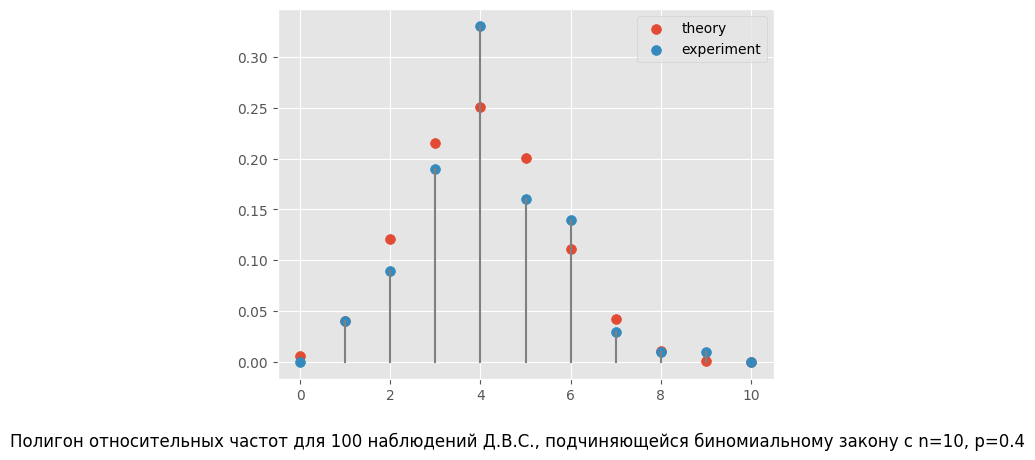

In [55]:
plt.scatter(Xvals, p_k, s=50, label='theory')
plt.scatter(Xvals, nn, s=50, label='experiment')
for i in range(len(Xvals)):
    plt.plot([Xvals[i], Xvals[i]], [0, nn[i]], c='grey')
plt.legend()
plt.suptitle(f'Полигон относительных частот для 100 наблюдений Д.В.С., подчиняющейся биномиальному закону с n={n}, p={p}', y=0)
plt.show()

In [60]:
import math
poisson_prob = lambda lam, k: lam**k * np.exp(-lam) / math.factorial(k)
k_list = list(range(10))
lam = 2

p_k = [poisson_prob(lam, k) for k in k_list]
print(f'P(X<3)={sum(p_k[0:3])}, P(X<10)={sum(p_k)}')
print(np.round(p_k[:8], 4))

P(X<3)=0.6766764161830635, P(X<10)=0.9999535019249829
[0.1353 0.2707 0.2707 0.1804 0.0902 0.0361 0.012  0.0034]


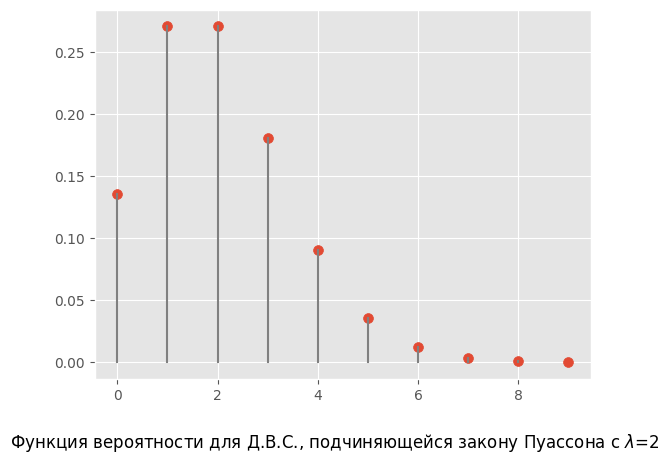

In [63]:
plt.scatter(k_list, p_k, s=50)
for k in k_list:
    plt.plot([k, k], [0, p_k[k]], c='grey')
plt.suptitle(f'Функция вероятности для Д.В.С., подчиняющейся закону Пуассона с $\lambda$={lam}', y=0)
plt.show()


[0.11, 0.23, 0.31, 0.24, 0.06, 0.03, 0.01, 0.01, 0.0, 0.0]


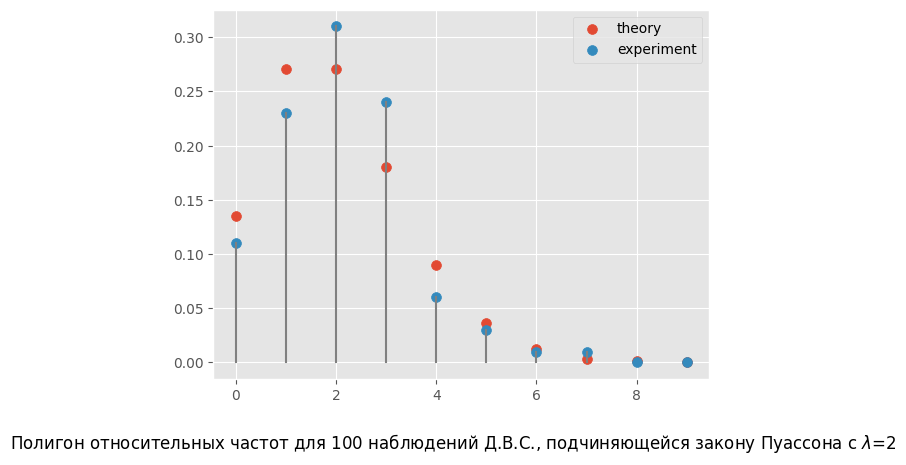

In [68]:
N = 100
res = np.random.poisson(lam=2, size=N)
Xvals = np.arange(0, 10, dtype=int)
nvals = {k:sum(res==k)/N for k in Xvals}
nn = list(nvals.values())
print(nn)


plt.scatter(k_list, p_k, s=50, label='theory')
plt.scatter(Xvals, nn, s=50, label='experiment')
for i in range(len(Xvals)):
    plt.plot([Xvals[i], Xvals[i]], [0, nn[i]], c='grey')
plt.legend()
plt.suptitle(f'Полигон относительных частот для 100 наблюдений Д.В.С., подчиняющейся закону Пуассона с $\lambda$={lam}', y=0)
plt.show()
